In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [2]:

# Define paths
train_path = 'C:\\Users\\polna\\Aadya\\food_classification\\Images\\Images\\train'
val_path = 'C:\\Users\\polna\\Aadya\\food_classification\\Images\\Images\\val'

In [3]:
# Image size and batch size
img_size = (384, 384)
batch_size = 32

In [4]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./385,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./385)

In [5]:
# Load VGG-16 model with ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(384, 384, 3))

In [6]:
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(385, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))  # Assuming 19 classes

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4200 images belonging to 6 classes.
Found 1800 images belonging to 6 classes.


In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/30


131/131 [==============================] - 1497s 11s/step - loss: 3.2125 - accuracy: 0.2920 - val_loss: 1.5064 - val_accuracy: 0.4888
Epoch 2/30
131/131 [==============================] - 1430s 11s/step - loss: 1.5097 - accuracy: 0.3822 - val_loss: 1.4196 - val_accuracy: 0.4900
Epoch 3/30
131/131 [==============================] - 1412s 11s/step - loss: 1.4667 - accuracy: 0.3942 - val_loss: 1.1459 - val_accuracy: 0.5815
Epoch 4/30
131/131 [==============================] - 1399s 11s/step - loss: 1.3958 - accuracy: 0.4227 - val_loss: 1.0609 - val_accuracy: 0.6763
Epoch 5/30
131/131 [==============================] - 1400s 11s/step - loss: 1.3332 - accuracy: 0.4448 - val_loss: 1.1068 - val_accuracy: 0.6233
Epoch 6/30
131/131 [==============================] - 1389s 11s/step - loss: 1.3126 - accuracy: 0.4451 - val_loss: 1.1209 - val_accuracy: 0.6367
Epoch 7/30
131/131 [==============================] - 1304s 10s/step - loss: 1.3057 - accuracy: 0.4530 - val_loss: 1.0684 - val_

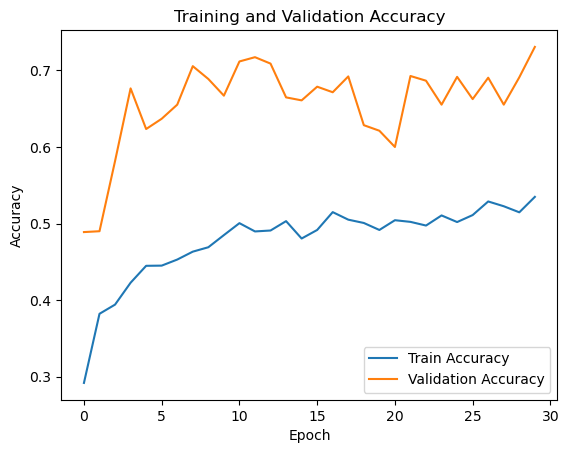

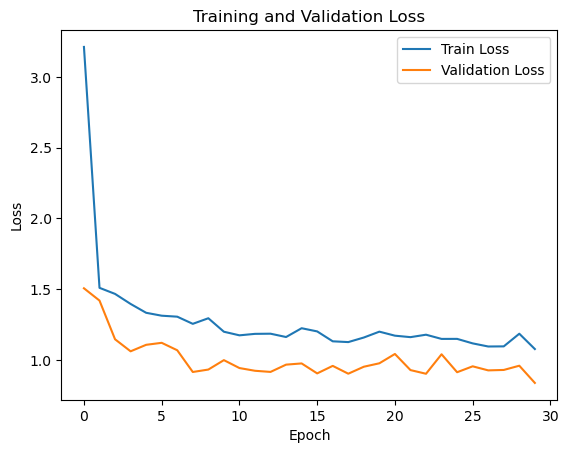

In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [16]:

from tensorflow.keras.models import model_from_json



# load YAML and create model


json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
img_path = 'C:\Users\polna\Aadya\food_classification\Images\Images\WhatsApp Image 2024-01-30 at 07.40.04_a97667dc.jpg'
img = load_img(img_path, target_size=(224, 224))

# Preprocess the image for the model
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get predictions from the model
predictions = model.predict(img_array)

# Decode the predictions using decode_predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print the decoded predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")